# TestFacesNorm - Trying to normalise face images so are in 100 * 100 matrix, fully occupying that space and grey background removed

Terry Snow 14/1/17

In [2]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [3]:
%pwd

'/Users/terrysnow/Big Data/Faces'

(0,)
<class 'numpy.ndarray'>


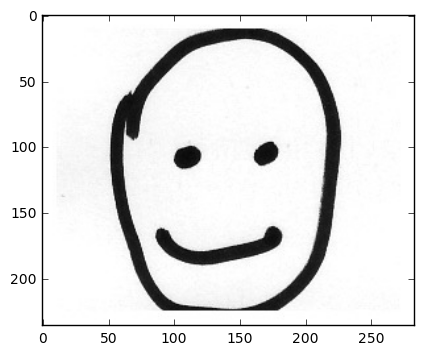

In [105]:
import glob
imfiles = glob.glob("data\\faces\\*.jpeg")
print(np.shape(imfiles))

#path = "data/faces/scan001S.jpeg"
path = "data/faces/scan004S.jpeg"
#path = "data/faces/scan094N.jpeg"
#path = "data/faces/scan020N.jpeg"
#path = "data/faces/scan044N.jpeg"
#path = "data/faces/scan054S.jpeg"
#path = "data/faces/scan088N.jpeg"
face = mpimg.imread(path,format='jpeg')
print(type(face))
plt.imshow(face,cmap=plt.get_cmap("gray"))

In [106]:
type(face), np.ndim(face), np.shape(face)

(numpy.ndarray, 2, (236, 283))

# Looking for algo to find the extent of the face max/min rol / col

In [107]:
#pure white is a value of 255, threshold for black is any number less than 40
#can see this by inspecting a row of the image.
face[100,30:60]

array([248, 249, 249, 246, 245, 245, 243, 244, 244, 241, 246, 248, 249,
       250, 248, 247, 248, 248, 243, 245, 246, 235,  16,  34,  26,  24,
        30,  20,  30,  27], dtype=uint8)

In [108]:
#have tried thresholds of 30,40, and 50
#Issue is that there is a tradeoff between losing face edge and detecting scanner noise
THRESH_HOLD = 50
itemindex = np.where(face < THRESH_HOLD)
print(itemindex)

(array([ 11,  11,  11, ..., 224, 224, 224]), array([137, 138, 139, ..., 176, 177, 178]))


In [109]:
rowvals, colvals = itemindex

In [110]:
minrow, maxrow, mincol, maxcol = rowvals[0], rowvals[-1], min(colvals), max(colvals)
minrow, maxrow, mincol, maxcol

(11, 224, 52, 226)

In [111]:
#now try average across rows and columns
THRESH_HOLD = 230
rowsav = face.mean(axis=1)
np.shape(rowsav)
colsav = face.mean(axis=0)
itemindex = np.where(rowsav<THRESH_HOLD)
rowvals = itemindex[0]
minrow, maxrow = rowvals[0], rowvals[-1]
itemindex = np.where(colsav<THRESH_HOLD)
colvals = itemindex[0]
mincol, maxcol = colvals[0], colvals[-1]
minrow, maxrow, mincol, maxcol

(11, 224, 52, 225)

In [117]:
facenorm = face[minrow:(maxrow+1), mincol:(maxcol+1)]
np.shape(facenorm)

(214, 174)

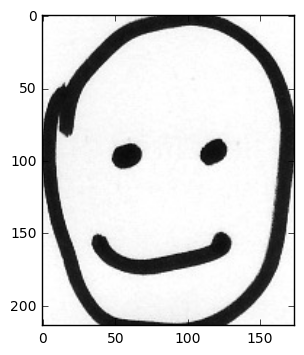

In [118]:
plt.imshow(facenorm,cmap=plt.get_cmap("gray"))

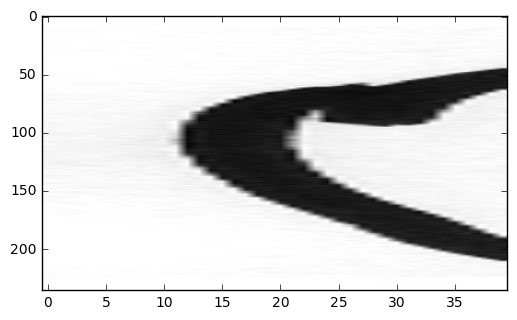

In [114]:
facenormalt = face[:,40:80]
#plt.figure(figsize=(15,5))
plt.imshow(facenormalt,cmap=plt.get_cmap("gray"),aspect=.100)

# Now what to resize , to say 30 by 30

In [115]:
NEWSIZE_ROW = 30
NEWSIZE_COL = 30
ROW_ORIG_SIZE,COL_ORIG_SIZE = np.shape(facenorm)
facenorm1 = np.zeros((NEWSIZE_ROW,NEWSIZE_COL),dtype=np.uint8)

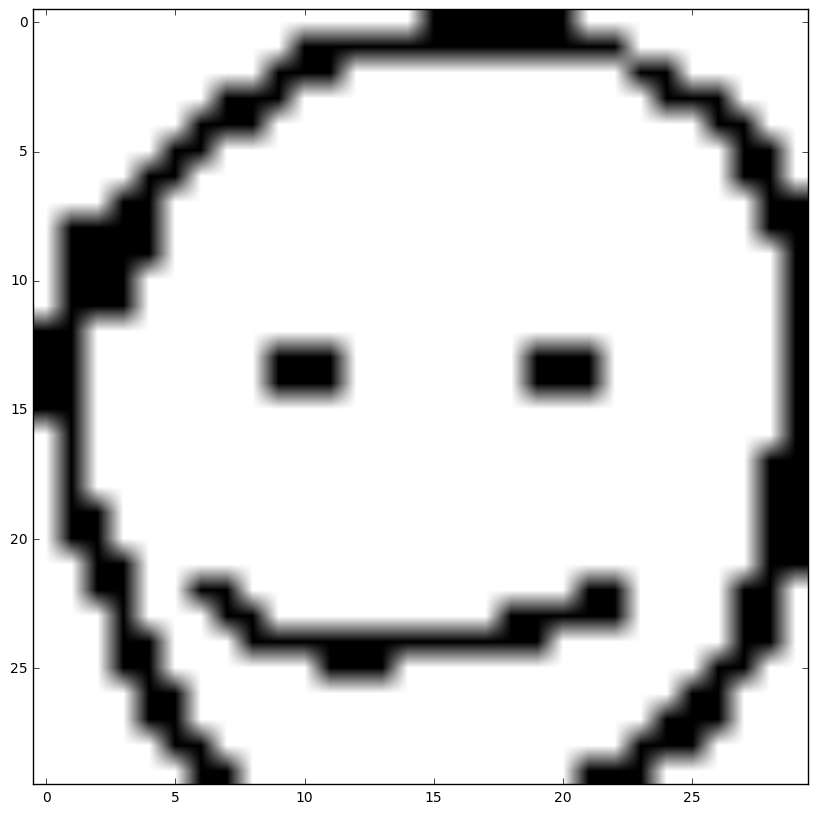

In [116]:
#now make more black and white
rBase, cBase = np.shape(facenorm)
for r in range(0,NEWSIZE_ROW):
    for c in range(0,NEWSIZE_COL):
        facenorm1[r,c] = 0 if facenorm[round((r * ROW_ORIG_SIZE)/NEWSIZE_ROW), 
                                  round((c * COL_ORIG_SIZE)/NEWSIZE_COL)] < 100 else 255
        
plt.figure(figsize=(10,10))
plt.imshow(facenorm1,cmap=plt.get_cmap("gray"))

In [91]:
type(facenorm1[0,0])

numpy.uint8